In [5]:
import tensorflow as tf
import numpy as np

In [6]:
N, D, H = 64, 1000, 100

with tf.device('/gpu:0'):
    x = tf.placeholder(tf.float32, shape=(N, D))
    y = tf.placeholder(tf.float32, shape=(N, D))
    w1 = tf.placeholder(tf.float32, shape=(D, H))
    w2 = tf.placeholder(tf.float32, shape=(H, D))
    
    hidden_layer = tf.maximum(0.0, tf.matmul(x, w1))
    scores = tf.matmul(hidden_layer, w2)
    predicted = y - scores
    loss = tf.reduce_mean(tf.reduce_sum(predicted ** 2, axis=1))
    
    grad_w1, grad_w2 = tf.gradients(loss, [w1, w2])

In [7]:
# with tf.Session() as session:
#     values = {x: np.random.randn(N, D),
#              w1: np.random.randn(D, H),
#              w2: np.random.randn(H, D),
#              y: np.random.randn(N, D)}
    
#     out = session.run([loss, grad_w1, grad_w2], feed_dict=values)
#     loss, grad_w1_val, grad_w2_val = out

In [8]:
with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as session:
    values = {x: np.random.randn(N, D),
             w1: np.random.randn(D, H),
             w2: np.random.randn(H, D),
             y: np.random.randn(N, D)}
    lr = 1e-5
    for t in range(100000):
        loss_1, grad_w1_val, grad_w2_val = session.run([loss, grad_w1, grad_w2], feed_dict=values)
        values[w1] -= lr * grad_w1_val
        values[w2] -= lr * grad_w2_val
        if t % 100 == 0:
            print(loss_1)

4.93787e+07
973.331
973.329
973.326
973.324
973.322
973.32
973.318
973.316
973.314
973.311
973.309
973.307
973.305
973.303
973.301
973.298
973.296
973.294
973.292
973.29
973.288
973.285
973.283
973.281
973.279
973.277
973.275
973.272
973.27
973.268
973.266
973.264
973.262
973.26
973.257
973.255
973.253
973.251
973.249
973.247
973.244
973.242
973.24
973.238
973.236
973.234
973.231
973.229
973.227
973.225
973.223
973.221
973.218
973.216
973.214
973.212
973.21
973.208
973.205
973.203
973.201
973.199
973.197
973.195
973.192
973.19
973.188
973.186
973.184
973.182
973.179
973.177
973.175
973.173
973.171
973.169
973.166
973.164
973.162
973.16
973.158
973.156
973.153
973.151
973.149
973.147
973.145
973.142
973.14
973.138
973.136
973.134
973.132
973.13
973.127
973.125
973.123
973.121
973.119
973.116
973.114
973.112
973.11
973.108
973.106
973.103
973.101
973.099
973.097
973.095
973.093
973.09
973.088
973.086
973.084
973.082
973.079
973.077
973.075
973.073
973.071
973.069
973.066
973.064
973.062


In [9]:
loss

<tf.Tensor 'Mean_1:0' shape=() dtype=float32>

In [10]:
first = tf.constant(np.array([1, 2, 3, 4]))
second = tf.constant(np.array([10, 11, 12, 13]))
result = tf.multiply(first, second)
print(result)

Tensor("Mul:0", shape=(4,), dtype=int64)


In [11]:
result?

In [210]:
result.eval()

ValueError: Cannot evaluate tensor using `eval()`: No default session is registered. Use `with sess.as_default()` or pass an explicit session to `eval(session=sess)`

In [ ]:
session = tf.Session()
print(session.run(result))
session.close()

In [ ]:
config=tf.ConfigProto(log_device_placement=True)
print(config)

In [ ]:
session = tf.Session()
print(session.run(result))
session.close()

# Belgium Traffic Signal CNN

In [ ]:
import tensorflow as tf
import numpy as np
from skimage import data
import os
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
ROOT_PATH = '/home/deepanshu/common/dataset/belgium_traffic_signal'
train_data_directory = os.path.join(ROOT_PATH, 'Training')
test_data_directory = os.path.join(ROOT_PATH, 'Testing')


In [ ]:
def load_data(data_dir):
    directories = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
    labels = []
    images = []
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f) for f in os.listdir(label_dir) if f.endswith(".ppm")]
        
        for f in file_names:
            images.append(data.imread(f))
            labels.append(int(d))
            
    return images, labels
        

In [ ]:
images, labels = load_data(train_data_directory)

In [211]:
images = np.array(images)
labels = np.array(labels)

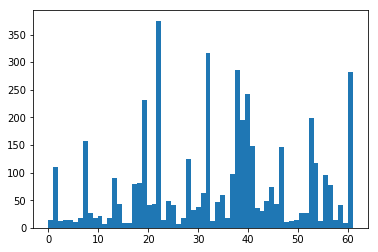

In [212]:
plt.hist(labels, 62)
plt.show()

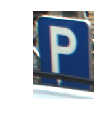

shape: (136, 94, 3), min: 0, max: 255


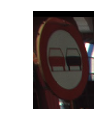

shape: (205, 127, 3), min: 0, max: 255


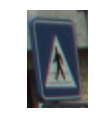

shape: (98, 61, 3), min: 8, max: 170


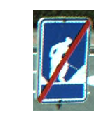

shape: (144, 87, 3), min: 0, max: 255


In [213]:
traffic_signal = np.random.randint(1, 4000, size=4)

for i in range(len(traffic_signal)):
    plt.subplot(1, 4, i + 1)
    plt.axis("off")
    plt.imshow(images[traffic_signal[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images[traffic_signal[i]].shape, 
                                                  images[traffic_signal[i]].min(), 
                                                  images[traffic_signal[i]].max()))


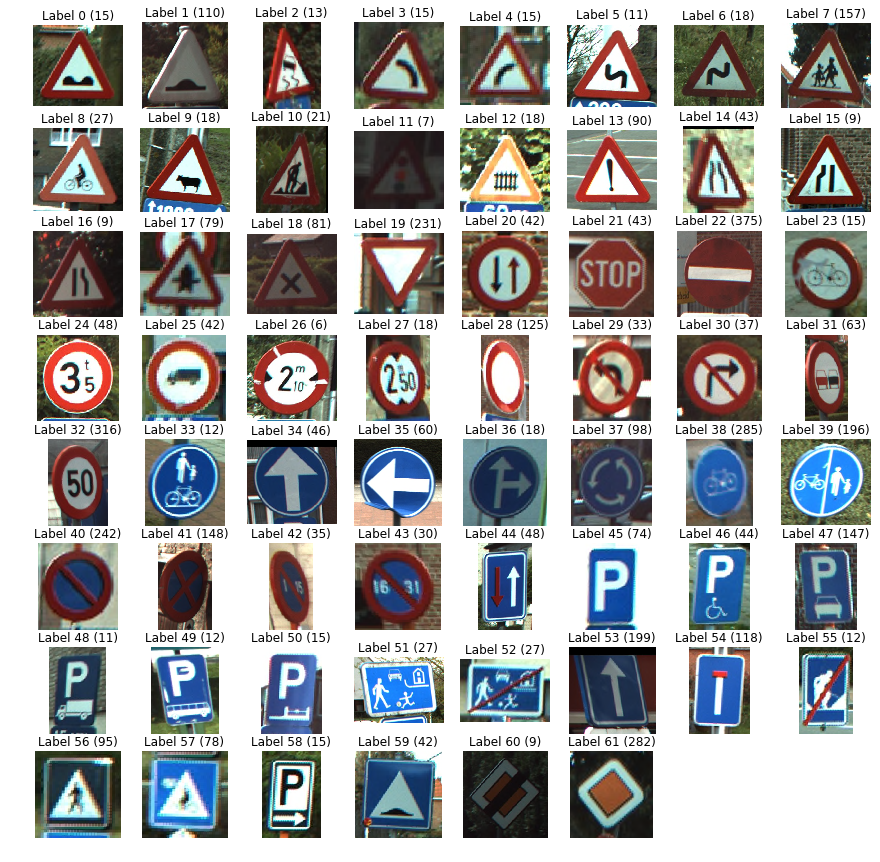

In [214]:
unique_labels = set(labels)
i = 1

plt.figure(figsize=(15, 15))
for label in unique_labels:
    image = images[np.argmax(labels == label)]
    plt.subplot(8, 8, i)
    plt.axis("off")
    plt.title("Label {0} ({1})".format(label, np.count_nonzero(labels == label)))
    i += 1
    plt.imshow(image)
    
plt.show()

In [215]:
from skimage import transform 
image_28 = [transform.resize(image, (28, 28)) for image in images]

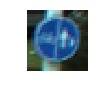

shape: (28, 28, 3), min: 0.0104741896759, max: 0.968557422969


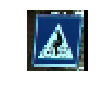

shape: (28, 28, 3), min: 0.0, max: 1.0


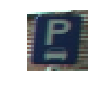

shape: (28, 28, 3), min: 0.0627450980392, max: 1.0


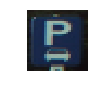

shape: (28, 28, 3), min: 0.0469862945178, max: 0.739565826331


In [216]:
traffic_signal = np.random.randint(1, 4000, size=4)

for i in range(len(traffic_signal)):
    plt.subplot(1, 4, i + 1)
    plt.axis("off")
    plt.imshow(image_28[traffic_signal[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(image_28[traffic_signal[i]].shape, 
                                                  image_28[traffic_signal[i]].min(), 
                                                  image_28[traffic_signal[i]].max()))

In [217]:
from skimage.color import rgb2gray
image_28 = np.array(image_28)
image_28 = rgb2gray(image_28)

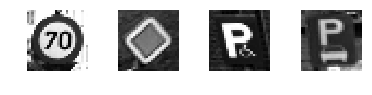

In [218]:
traffic_signs = [300, 2250, 3650, 4000]

for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(image_28[traffic_signs[i]], cmap="gray")
#     plt.imshow(image_28[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    
# Show the plot
plt.show()

In [219]:
x = tf.placeholder(dtype=tf.float32, shape=[None, 28, 28])
y = tf.placeholder(dtype=tf.float32, shape=[None, 62])

# Flatten images
images_flat = tf.contrib.layers.flatten(x)

# Fully connected layer
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)

# Loss function
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y, logits=logits))

# Optimizer
train_op = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

# Convert logits to label indexes
correct_pred = tf.argmax(logits, 1)

# Define an accuracy metric
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [220]:
print("images_flat: ", images_flat)
print("logits: ", logits)
print("loss: ", loss)
print("predicted_labels: ", correct_pred)

('images_flat: ', <tf.Tensor 'Flatten_15/Reshape:0' shape=(?, 784) dtype=float32>)
('logits: ', <tf.Tensor 'fully_connected_15/Relu:0' shape=(?, 62) dtype=float32>)
('loss: ', <tf.Tensor 'Mean_31:0' shape=() dtype=float32>)
('predicted_labels: ', <tf.Tensor 'ArgMax_14:0' shape=(?,) dtype=int64>)


In [221]:
tf.set_random_seed(1234)
session = tf.Session()
print(labels.shape)

session.run(tf.global_variables_initializer())
one_hot = np.eye(len(set(labels)))[labels]

for i in range(201):
        print('EPOCH', i)
        _, accuracy_val = session.run([train_op, loss], feed_dict={x: image_28, y: one_hot})
        if i % 10 == 0:
            print("Loss: ", loss)
        print('DONE WITH EPOCH')
        


(4575,)
('EPOCH', 0)
('Loss: ', <tf.Tensor 'Mean_31:0' shape=() dtype=float32>)
DONE WITH EPOCH
('EPOCH', 1)
DONE WITH EPOCH
('EPOCH', 2)
DONE WITH EPOCH
('EPOCH', 3)
DONE WITH EPOCH
('EPOCH', 4)
DONE WITH EPOCH
('EPOCH', 5)
DONE WITH EPOCH
('EPOCH', 6)
DONE WITH EPOCH
('EPOCH', 7)
DONE WITH EPOCH
('EPOCH', 8)
DONE WITH EPOCH
('EPOCH', 9)
DONE WITH EPOCH
('EPOCH', 10)
('Loss: ', <tf.Tensor 'Mean_31:0' shape=() dtype=float32>)
DONE WITH EPOCH
('EPOCH', 11)
DONE WITH EPOCH
('EPOCH', 12)
DONE WITH EPOCH
('EPOCH', 13)
DONE WITH EPOCH
('EPOCH', 14)
DONE WITH EPOCH
('EPOCH', 15)
DONE WITH EPOCH
('EPOCH', 16)
DONE WITH EPOCH
('EPOCH', 17)
DONE WITH EPOCH
('EPOCH', 18)
DONE WITH EPOCH
('EPOCH', 19)
DONE WITH EPOCH
('EPOCH', 20)
('Loss: ', <tf.Tensor 'Mean_31:0' shape=() dtype=float32>)
DONE WITH EPOCH
('EPOCH', 21)
DONE WITH EPOCH
('EPOCH', 22)
DONE WITH EPOCH
('EPOCH', 23)
DONE WITH EPOCH
('EPOCH', 24)
DONE WITH EPOCH
('EPOCH', 25)
DONE WITH EPOCH
('EPOCH', 26)
DONE WITH EPOCH
('EPOCH', 27)
D

[41, 17, 52, 30, 18, 53, 40, 0, 32, 36]
[40 17 38 32 18 53 40  1 32 38]


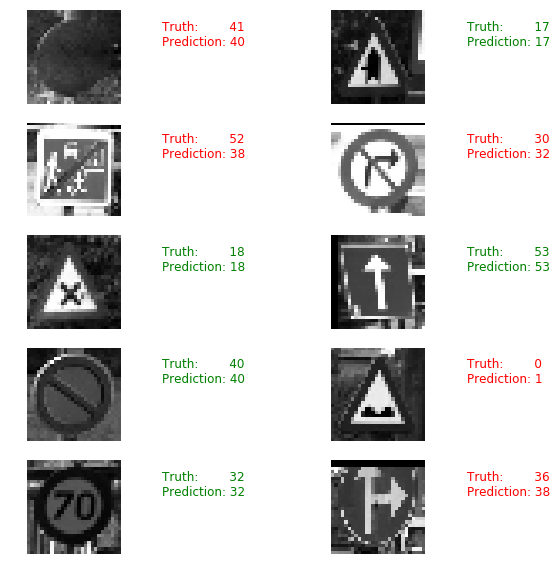

In [222]:
import random

# Pick 10 random images
sample_indexes = random.sample(range(len(image_28)), 10)
sample_images = [image_28[i] for i in sample_indexes]
sample_labels = [labels[i] for i in sample_indexes]

# Run the "correct_pred" operation
predicted = session.run([correct_pred], feed_dict={x: sample_images})[0]
                        
# Print the real and predicted labels
print(sample_labels)
print(predicted)

# Display the predictions and the ground truth visually.
fig = plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    prediction = predicted[i]
    plt.subplot(5, 2,1+i)
    plt.axis('off')
    color='green' if truth == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), 
             fontsize=12, color=color)
    plt.imshow(sample_images[i],  cmap="gray")

plt.show()

In [223]:
session.close()

## Two layer network with TF

In [3]:
import tensorflow as tf
import numpy as np

In [19]:
def foo(N, D, H1, H2):
    with tf.device('/gpu:0'):
        x = tf.placeholder(tf.float32, shape=(N, D))
        y = tf.placeholder(tf.float32, shape=(N, D))
        w1 = tf.placeholder(tf.float32, shape=(D, H1))
        w2 = tf.placeholder(tf.float32, shape=(H1, H2))
        w3 = tf.placeholder(tf.float32, shape=(H2, D))

        layer_1 = tf.maximum(0.0, tf.matmul(x, w1))
        layer_2 = tf.maximum(0.0, tf.matmul(layer_1, w2))
        scores = tf.matmul(layer_2, w3)

        predicted = y - scores
        loss = tf.reduce_mean(tf.reduce_sum(predicted ** 2, axis=1))

        grad_w1, grad_w2, grad_w3 = tf.gradients(loss, [w1, w2, w3])

    with tf.Session() as session:
        values = {x: np.random.randn(N, D),
                  w1: np.random.randn(D, H1),
                  w2: np.random.randn(H1, H2),
                  w3: np.random.randn(H2, D),
                  y: np.random.randn(N, D)}
        lr = 1e-5
        for t in range(1000):
            loss_, grad_w1_val, grad_w2_val, grad_w3_val = session.run([loss, grad_w1, grad_w2, grad_w3], feed_dict=values)
            values[w1] -= lr * grad_w1_val
            values[w2] -= lr * grad_w2_val
            values[w3] -= lr * grad_w3_val
            if t % 100 == 0:
                print(loss_)

In [22]:
N, D = 64, 1000
for tup in [(110, 50), (100, 10), (300, 300), (400, 400)]:
    foo(N, D, *tup)
    print()

1.26233e+09
999.248
999.248
999.248
999.248
999.248
999.248
999.248
999.248
999.248
()
3.05404e+08
995.622
995.622
995.622
995.622
995.622
995.622
995.622
995.622
995.622
()
2.39385e+10
1003.26
1003.26
1003.26
1003.26
1003.26
1003.26
1003.26
1003.26
1003.26
()
4.12594e+10
1005.09
1005.09
1005.09
1005.09
1005.09
1005.09
1005.09
1005.09
1005.09
()


## Groups and dummy nodes

In [6]:
N, D, H = 64, 1000, 100

with tf.device('/gpu:0'):
    x = tf.placeholder(tf.float32, shape=(N, D))
    y = tf.placeholder(tf.float32, shape=(N, D))
    w1 = tf.Variable(tf.random_normal((D, H)))
    w2 = tf.Variable(tf.random_normal((H, D)))
    
    h = tf.maximum(tf.matmul(x, w1), 0)
    y_pred = tf.matmul(h, w2)
    diff = y_pred - y
    loss = tf.reduce_mean(tf.reduce_sum(diff ** 2, axis=1))
    grad_w1, grad_w2 = tf.gradients(loss, [w1, w2])
    
    lr = 1e-5
    new_w1 = w1.assign(w1 - lr * grad_w1)
    new_w2 = w2.assign(w2 - lr * grad_w2)
    
    updates = tf.group(new_w1, new_w2)
    
    with tf.Session() as session:
        session.run(tf.global_variables_initializer())
        values = {x: np.random.randn(N, D),
                  y: np.random.randn(N, D)}
        losses = []
        for i in range(50):
            loss_val, _ = session.run([loss, updates], feed_dict=values)